### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('.//data//coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(data.duplicated().sum())
for column in data.columns:
    print(f"\nUnique Values in {column}:")
    print(data[column].unique())


Duplicate Rows:
74

Unique Values in destination:
['No Urgent Place' 'Home' 'Work']

Unique Values in passanger:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

Unique Values in weather:
['Sunny' 'Rainy' 'Snowy']

Unique Values in temperature:
[55 80 30]

Unique Values in time:
['2PM' '10AM' '6PM' '7AM' '10PM']

Unique Values in coupon:
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

Unique Values in expiration:
['1d' '2h']

Unique Values in gender:
['Female' 'Male']

Unique Values in age:
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

Unique Values in maritalStatus:
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

Unique Values in has_children:
[1 0]

Unique Values in education:
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']

Unique Values in occupation:
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Tr

3. Decide what to do about your missing data -- drop, replace, other...

In [6]:
# Drop car column (too much missing)
clean_data = data.drop(columns=['car'])
print (clean_data)

           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female  21  Unmarried partner  .

4. What proportion of the total observations chose to accept the coupon?



In [7]:
accept_counts = clean_data['Y'].value_counts(normalize=True) * 100
print(f"Accepted: {accept_counts[1]:.2f}%")

print (accept_counts)

Accepted: 56.84%
Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

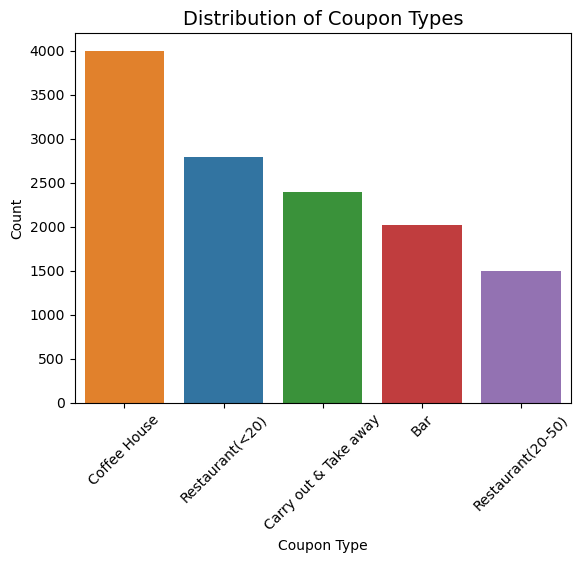

In [8]:
sns.countplot(data=clean_data, x='coupon', order=data['coupon'].value_counts().index, hue= 'coupon')
plt.title('Distribution of Coupon Types', fontsize=14)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
#plt.show()
plt.savefig('.//images//Coupon_distribution.png')

6. Use a histogram to visualize the temperature column.

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64


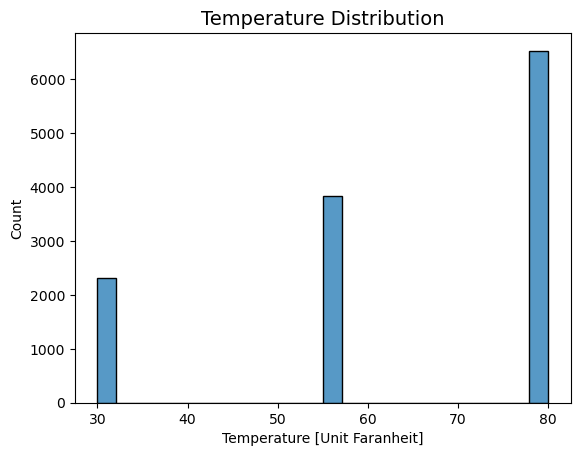

In [9]:
Temp = clean_data['temperature'].value_counts()
print (Temp)
sns.histplot(clean_data['temperature'])
plt.title('Temperature Distribution', fontsize=14)
plt.xlabel('Temperature [Unit Faranheit]')
plt.ylabel('Count')
plt.savefig('.//images/TemparatureHist.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [10]:
bar_coupons = clean_data[clean_data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [11]:
bar_counts = bar_coupons['Y'].value_counts()
bar_counts_percent = bar_coupons['Y'].value_counts(normalize=True) * 100
print (bar_counts)
print (bar_counts_percent)

Y
0    1190
1     827
Name: count, dtype: int64
Y
0    58.998513
1    41.001487
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# Define frequency groups
freq_low = ['never', 'less1', '1~3']
freq_high = ['4~8', 'gt8']

bar_low_freq_group = bar_coupons[bar_coupons['Bar'].isin(freq_low)]
low_freq_acceptance_rate = bar_low_freq_group['Y'].mean()
print(f"Acceptance rate for low frequency group (3 or fewer times a month): {low_freq_acceptance_rate}")

# Group 2: more than 3 times a month
bar_high_freq_group = bar_coupons[bar_coupons['Bar'].isin(freq_high)]
high_freq_acceptance_rate = bar_high_freq_group['Y'].mean()
print(f"Acceptance rate for high frequency group (more than 3 times a month): {high_freq_acceptance_rate}")

# Compare acceptance rates
if high_freq_acceptance_rate > low_freq_acceptance_rate:
    print("Drivers who go to bars more than three times a month,  have a higher acceptance rate.")
elif high_freq_acceptance_rate < low_freq_acceptance_rate:
    print("Drivers who go to bars less than or equal to 3 months, have a higher acceptance rate.")
else:
    print("Both groups have the same acceptance rate.")

Acceptance rate for low frequency group (3 or fewer times a month): 0.37061769616026713
Acceptance rate for high frequency group (more than 3 times a month): 0.7688442211055276
Drivers who go to bars more than three times a month,  have a higher acceptance rate.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [27]:
# Define the groups
threshold_freq = ['1~3', '4~8', 'gt8']
threshold_age = ['26', '31', '36', '41', '46', '50plus']

#group A : frequency is more than 1 and age is above 25
A = bar_coupons[
    (bar_coupons['Bar'].isin(threshold_freq)) &
    (bar_coupons['age'].isin(threshold_age))
]
#group B : frequency is more than 1 and age is above 25
B = bar_coupons[
    ~((bar_coupons['Bar'].isin(threshold_freq)) & 
    (bar_coupons['age'].isin(threshold_age)))
]

# Calculate acceptance rates
acceptance_groupA = A['Y'].mean()
acceptance_groupB = B['Y'].mean()

# Print acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month and are over 25: {acceptance_groupA}")
print(f"Acceptance rate for all other drivers: {acceptance_groupB}")

# Compare acceptance rates
if acceptance_groupA > acceptance_groupB:
    print("Drivers who go to bars more than once a month and are over 25 have a higher acceptance rate.")
elif acceptance_groupA < acceptance_groupB:
    print("Drivers who go to bars more than once a month and are over 25 have a lower acceptance rate.")
else:
    print("Both groups have the same acceptance rate.")

Acceptance rate for drivers who go to bars more than once a month and are over 25: 0.6952380952380952
Acceptance rate for all other drivers: 0.33500313087038197
Drivers who go to bars more than once a month and are over 25 have a higher acceptance rate.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [28]:
# Define your filters
bar_freq = ['1~3', '4~8', 'gt8']

# Define the groups C and D
#acceptance rate between driverswho go to bars more than once a month and had passengers 
#that were not a kid and had occupations other than farming, fishing, or forestry
# C = meets the criteria
C = bar_coupons[
    (bar_coupons['Bar'].isin(bar_freq)) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry')
]
# D otherwise
D = bar_coupons[
    ~((bar_coupons['Bar'].isin(bar_freq)) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['occupation'] != 'Farming Fishing & Forestry'))
]

# Calculate acceptance rates
acceptance_groupC = C['Y'].mean()
acceptance_groupD = D['Y'].mean()

# Print acceptance rates
print(f"Acceptance rate for drivers who go to bars more than once a month, passengers that were not kids, and occupations other than farming, fishing, or forestry: {acceptance_groupC}")
print(f"Acceptance rate for all other drivers: {acceptance_groupD}")

# Compare acceptance rates between the two groups
if acceptance_groupC > acceptance_groupD:
    print("Drivers who go to bars more than once a month,  passengers are not kids, and occupations other than farming, fishing, or forestry have a higher acceptance rate.")
elif acceptance_groupC < acceptance_groupD:
    print("Drivers who go to bars more than once a month,  passengers are not kids, and occupations other than farming, fishing, or forestry have a lower acceptance rate.")
else:
    print("Both groups have the same acceptance rate.")

Acceptance rate for drivers who go to bars more than once a month, passengers that were not kids, and occupations other than farming, fishing, or forestry: 0.7132486388384754
Acceptance rate for all other drivers: 0.296043656207367
Drivers who go to bars more than once a month,  passengers are not kids, and occupations other than farming, fishing, or forestry have a higher acceptance rate.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [29]:
# Define thresholds
bar_freq = ['1~3', '4~8', 'gt8']
age_under_30 = ['below21', '21', '26']
income = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
restaurant_freq = ['4~8', 'gt8']

# Group E: Drivers who go to bars more than once a month,  passengers are not kids, and are not widowed
E = bar_coupons[
    (bar_coupons['Bar'].isin(bar_freq)) &
    (bar_coupons['passanger'] != 'Kid(s)') &
    (bar_coupons['maritalStatus'] != 'Widowed')
]

# Group F: Drivers who go to bars more than once a month and are under the age of 30
F = bar_coupons[
    (bar_coupons['Bar'].isin(bar_freq)) &
    (bar_coupons['age'].isin(age_under_30))
]

# Group G : Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
G = bar_coupons[
    (bar_coupons['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
    (bar_coupons['income'].isin(income))
]

# Calculate acceptance rates
acceptance_groupE = E['Y'].mean()
acceptance_groupF = F['Y'].mean()
acceptance_groupG = G['Y'].mean()

# Print acceptance rates
print(f"Drivers who go to bars more than once a month,  passengers are not kids, and are not widowed: {acceptance_groupE}")
print(f"Drivers who go to bars more than once a month and are under the age of 30: {acceptance_groupF}")
print(f"Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_groupG}")

# Compare acceptance rates
max_acceptance_rate = max(acceptance_groupE, acceptance_groupF, acceptance_groupG)
if max_acceptance_rate == acceptance_groupE:
    print("Drivers who go to bars more than once a month, passengers arenot kids, and are not widowed have the highest acceptance rate.")
elif max_acceptance_rate == acceptance_groupF:
    print("Drivers who go to bars more than once a month and are under the age of 30 have the highest acceptance rate.")
else:
    print("Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K have the highest acceptance rate.")


Drivers who go to bars more than once a month,  passengers are not kids, and are not widowed: 0.7132486388384754
Drivers who go to bars more than once a month and are under the age of 30: 0.7217391304347827
Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.45348837209302323
Drivers who go to bars more than once a month and are under the age of 30 have the highest acceptance rate.


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who go to bars more than once a month and are under the age of 30 have the highest acceptance rate.


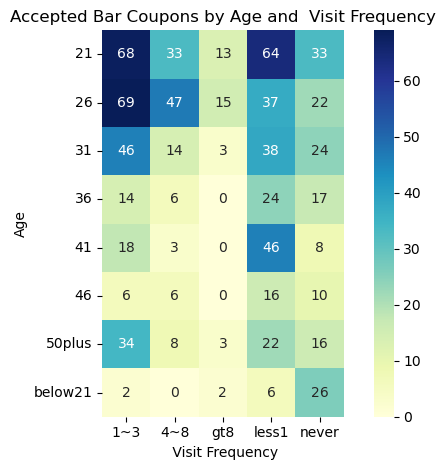

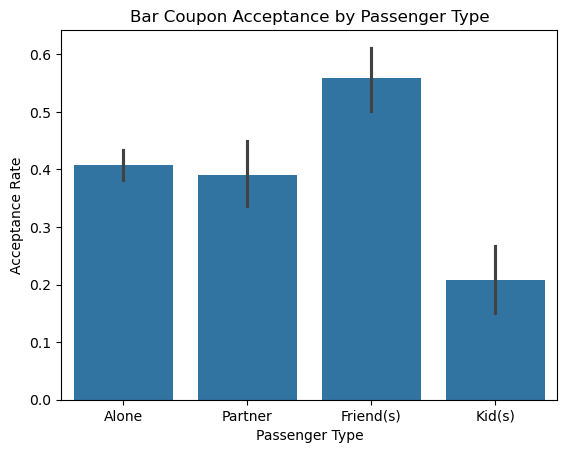

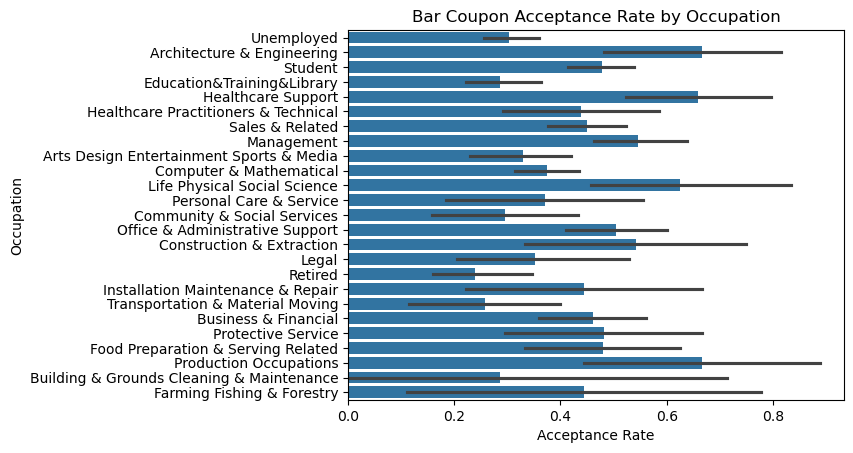

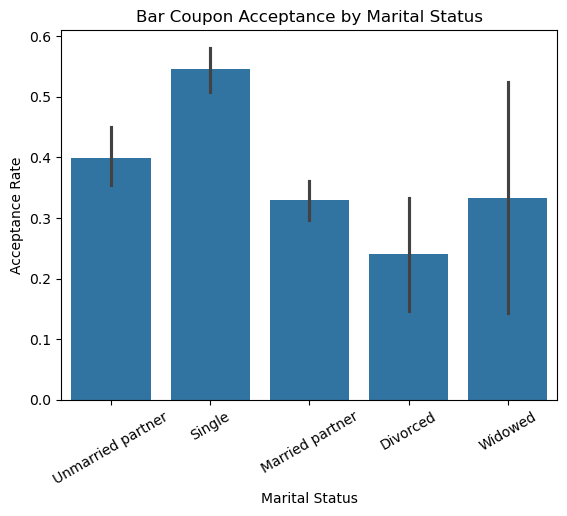

### Hypothesize
1. Drivers who go to bars more than once a month and are under the age of 30 have the highest acceptance rate.
2. Drivers who go to bars more than once a month have the highest acceptance rate.
3. Drivers who have passengers that are friends are more likely to accept bar coupons
4. Drivers who are single and unmsrried partners are more likely to accept bar coupons


In [45]:
max_acceptance_rate = max(acceptance_groupA, acceptance_groupB, acceptance_groupC, acceptance_groupD, acceptance_groupE, acceptance_groupF, acceptance_groupG)
if max_acceptance_rate == acceptance_groupA:
    print("Drivers who go to bars more than once a month and are over 25 have a higher acceptance rate.")
elif max_acceptance_rate == acceptance_groupB:
    print("Drivers who go to bars more than once a month and are over 25 have a higher acceptance rate.")
elif max_acceptance_rate == acceptance_groupC:
    print("Drivers who go to bars more than once a month,  passengers are not kids, and occupations other than farming, fishing, or forestry have a higher acceptance rate.")
elif max_acceptance_rate == acceptance_groupD: 
    print("Drivers who go to bars more than once a month,  passengers are not kids, and occupations other than farming, fishing, or forestry have a lower acceptance rate.")
elif max_acceptance_rate == acceptance_groupE:
    print("Drivers who go to bars more than once a month, passengers arenot kids, and are not widowed have the highest acceptance rate.")
elif max_acceptance_rate == acceptance_groupF:
    print("Drivers who go to bars more than once a month and are under the age of 30 have the highest acceptance rate.")
else:
    print("Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K have the highest acceptance rate.")

# Create a crosstab of bar frequency vs age group for accepted coupons
cross_tab = pd.crosstab(
    index=bar_coupons[bar_coupons['Y'] == 1]['age'],
    columns=bar_coupons[bar_coupons['Y'] == 1]['Bar']
)

#heat map for age & freq of visit patterns for accepting bar coupons
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', square=True)
plt.title('Accepted Bar Coupons by Age and  Visit Frequency')
plt.xlabel(' Visit Frequency')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('.//Images/AgeAndFreq.png')
plt.show()

# bar plot for passanger type
sns.barplot(data=bar_coupons, x='passanger', y='Y', order=['Alone', 'Partner', 'Friend(s)', 'Kid(s)'])
plt.title('Bar Coupon Acceptance by Passenger Type')
plt.xlabel('Passenger Type')
plt.ylabel('Acceptance Rate')
plt.savefig('.//Images/PassangerType.png')
plt.show()

#group bar plot for occupation 
sns.barplot(data=bar_coupons, y='occupation', x='Y',  orient='h')
plt.title('Bar Coupon Acceptance Rate by Occupation')
plt.xlabel('Acceptance Rate')
plt.ylabel('Occupation')
plt.savefig('.//Images/Occupation.png')
plt.show()


#group bar plot for marital status

sns.barplot(data=bar_coupons, x='maritalStatus', y='Y', estimator=np.mean)
plt.title('Bar Coupon Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Acceptance Rate')
plt.xticks(rotation=30)
plt.savefig('.//Images/MaritalStatus.png')
plt.show()

print ("### Hypothesize")

print("1. Drivers who go to bars more than once a month and are under the age of 30 have the highest acceptance rate.")
print("2. Drivers who go to bars more than once a month have the highest acceptance rate.")
print("3. Drivers who have passengers that are friends are more likely to accept bar coupons")
print("4. Drivers who are single and unmsrried partners are more likely to accept bar coupons")






### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  